<a href="https://colab.research.google.com/github/alifele/Brain_Computer_Interface-Competition-/blob/master/FFT_and_findingMotor_Cortex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt 

In [0]:
import sys
sys.path.append('/content/drive/My Drive/EEG_BCI/')
import datafetch
import plotters

In [0]:
subj_1 = datafetch.fetch_subject(1)

In [0]:
train_data_1 = subj_1['train_data_class1']

In [18]:
train_data_1.shape

(25, 7200, 63)

In [0]:
t = np.linspace(0,3,7200)
f = np.linspace(1/3, 2400, 7200)

In [0]:
fft = np.fft.fft(train_data_1)

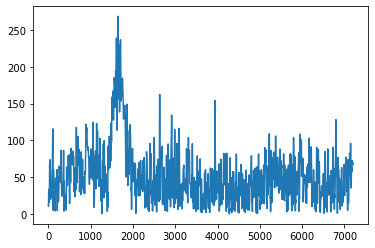

In [21]:
plt.plot(np.abs(fft[12,:,1]))

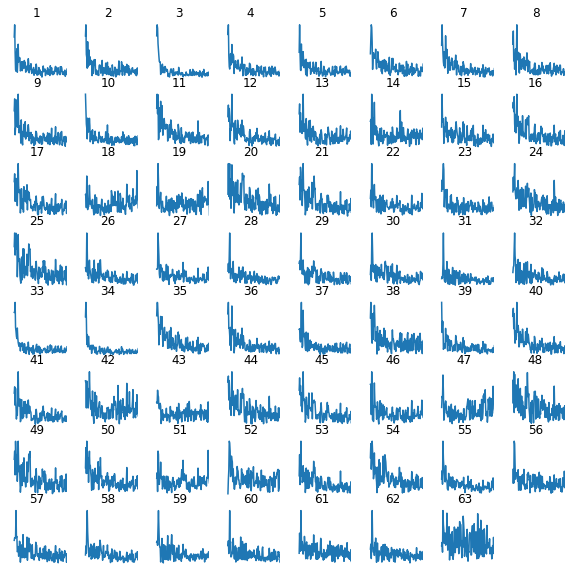

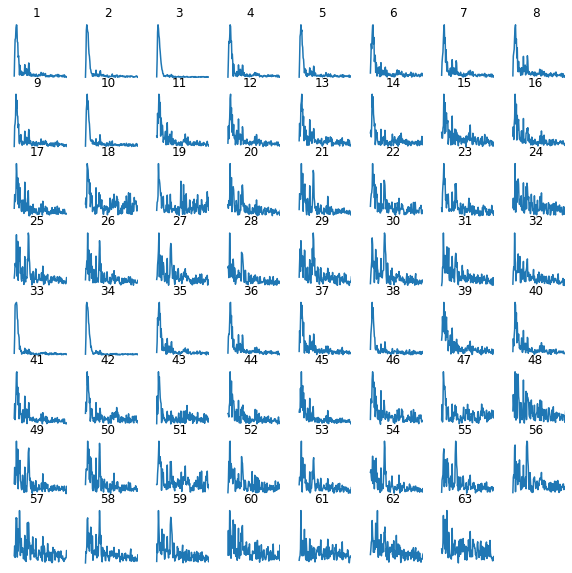

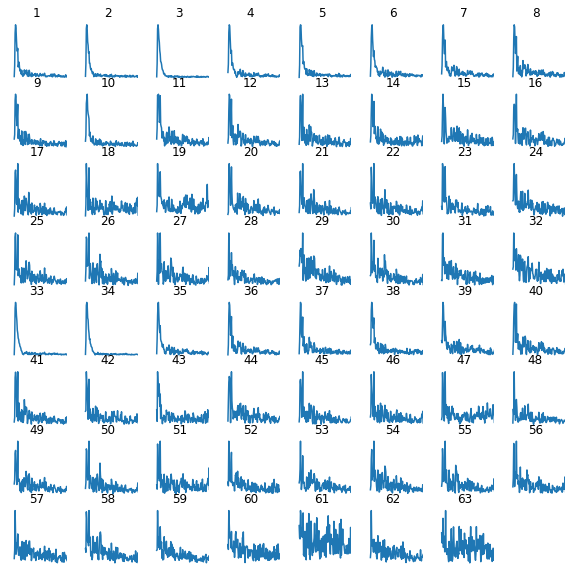

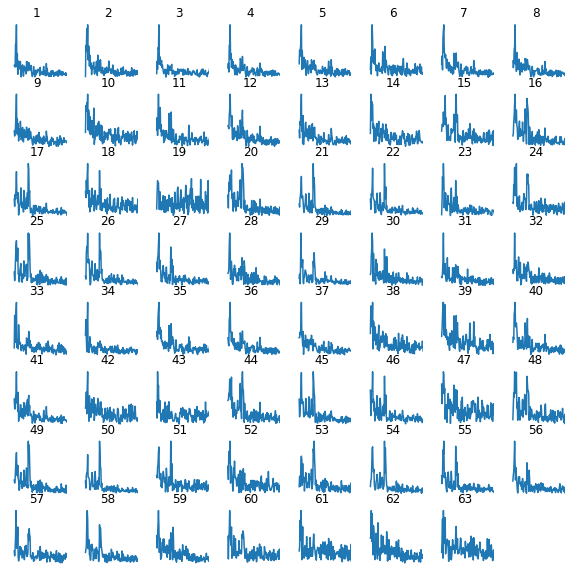

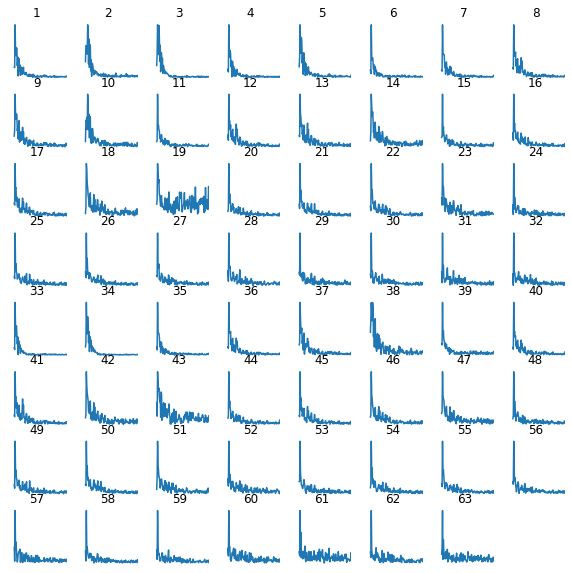

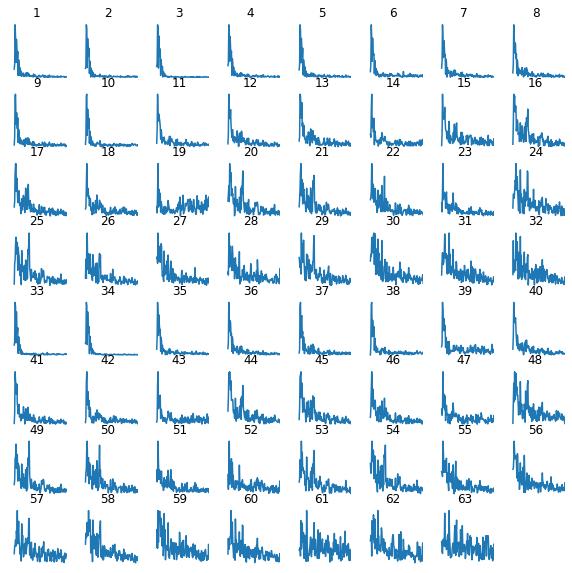

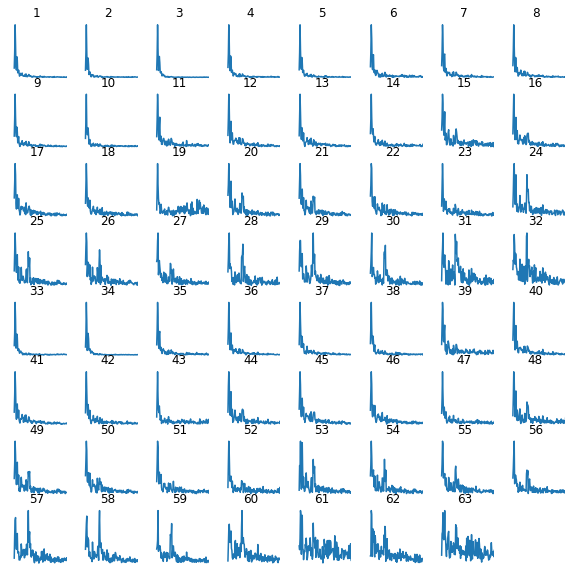

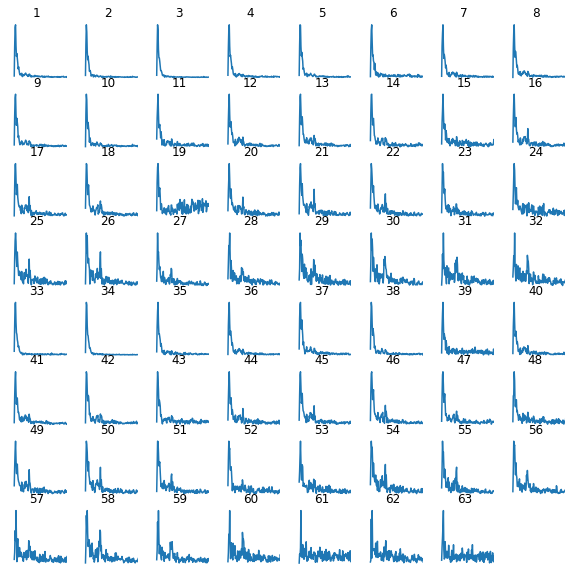

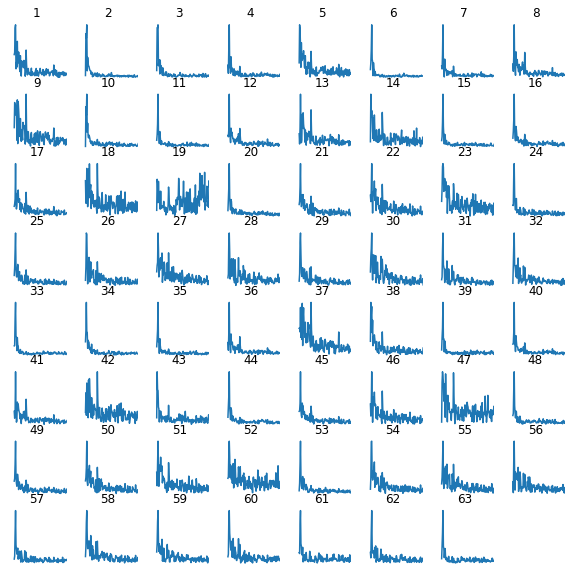

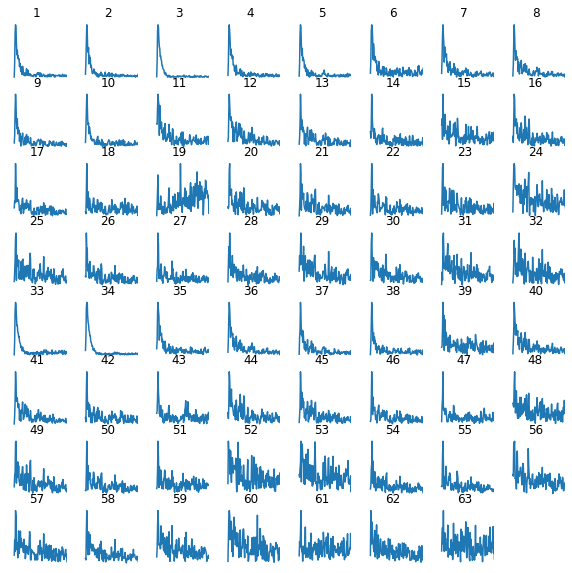

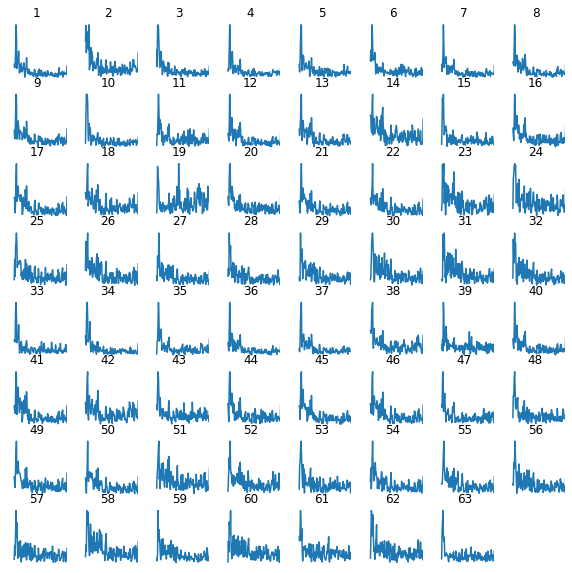

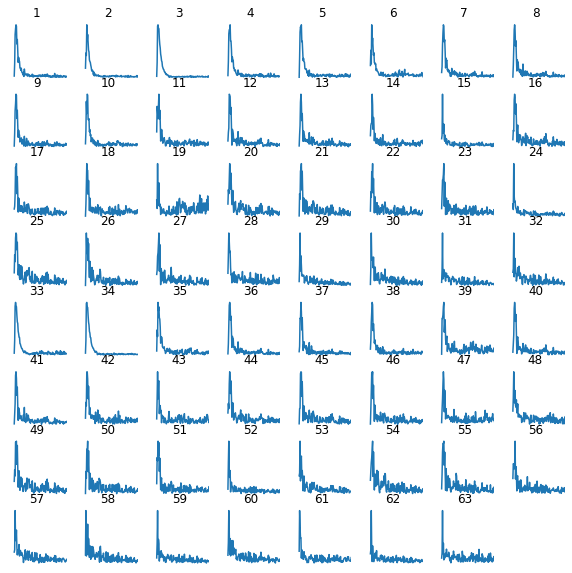

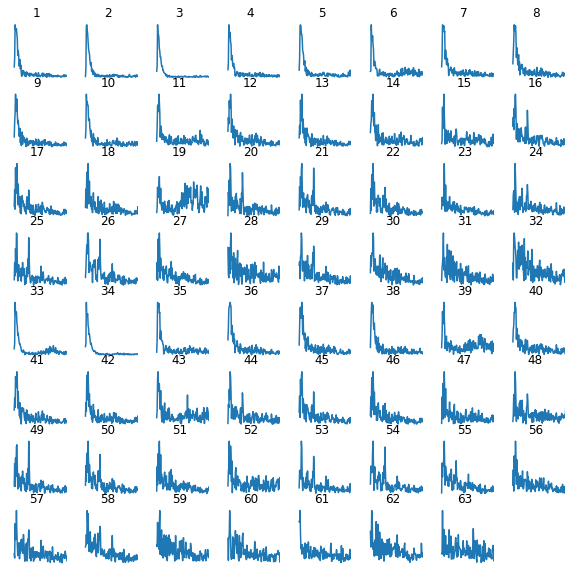

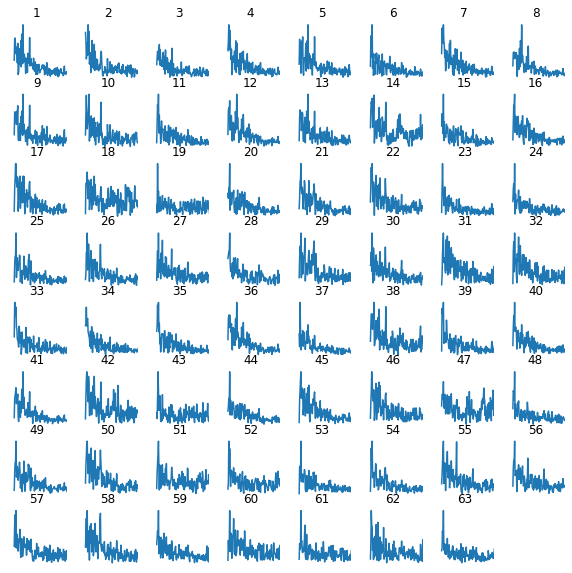

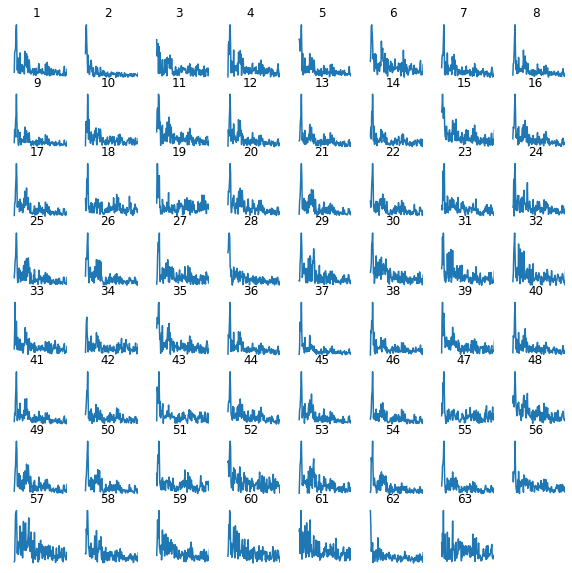

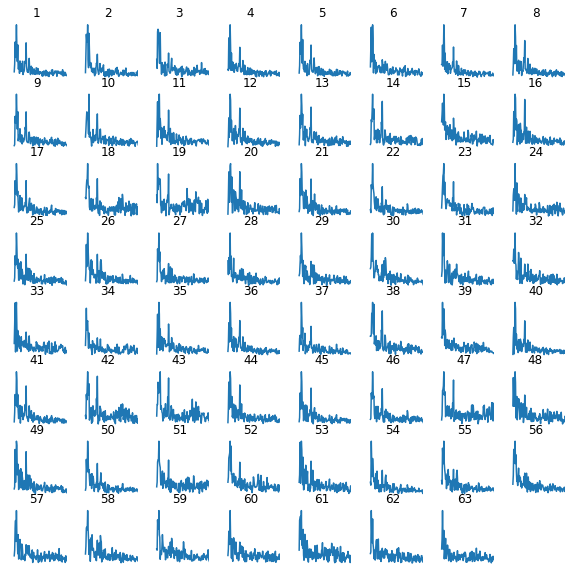

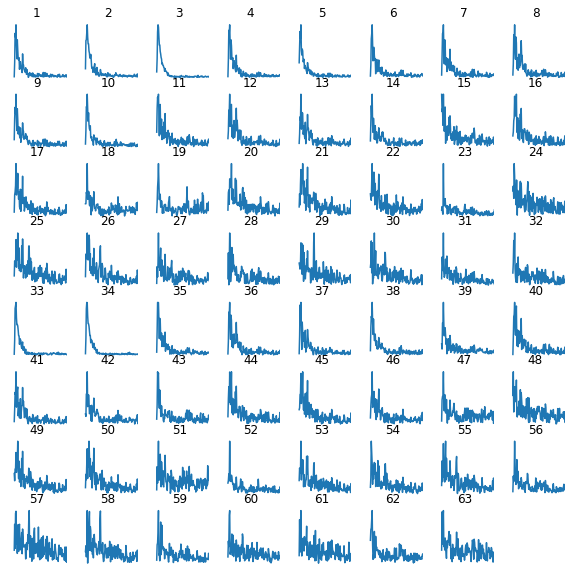

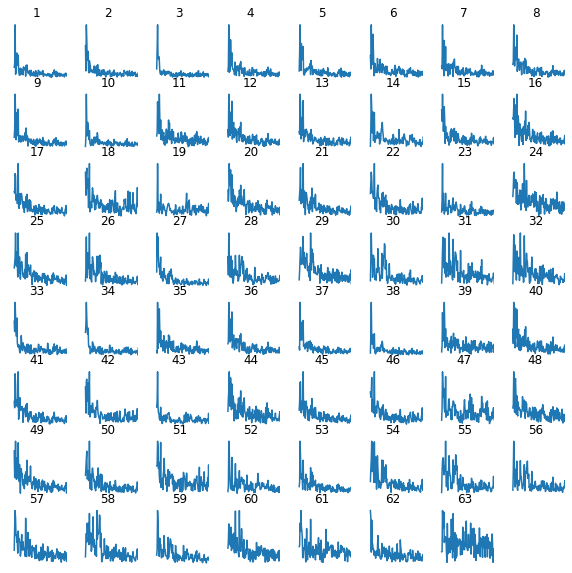

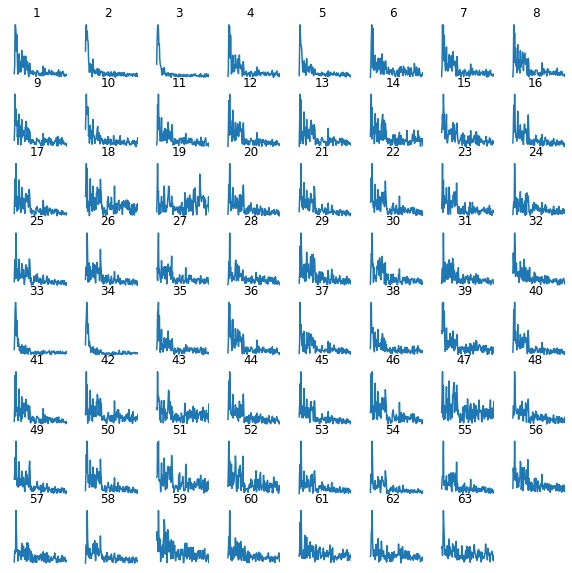

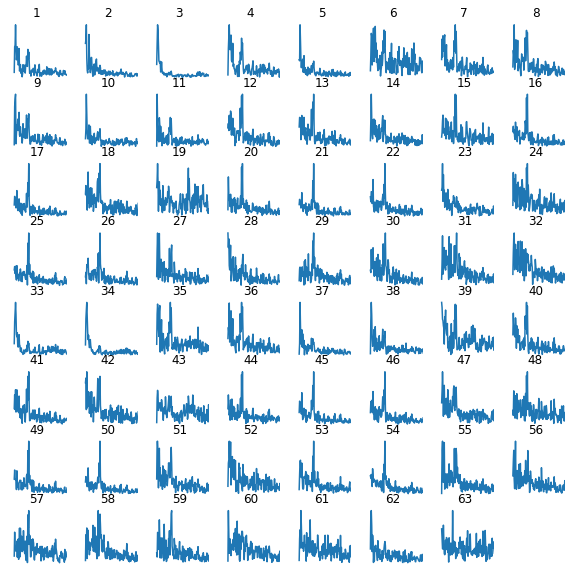

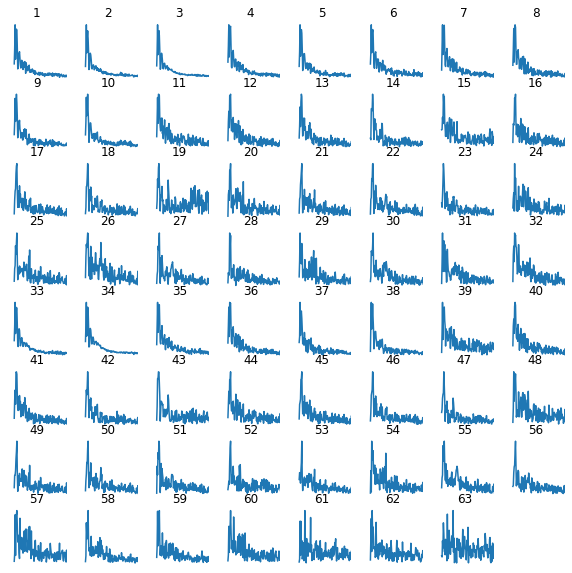

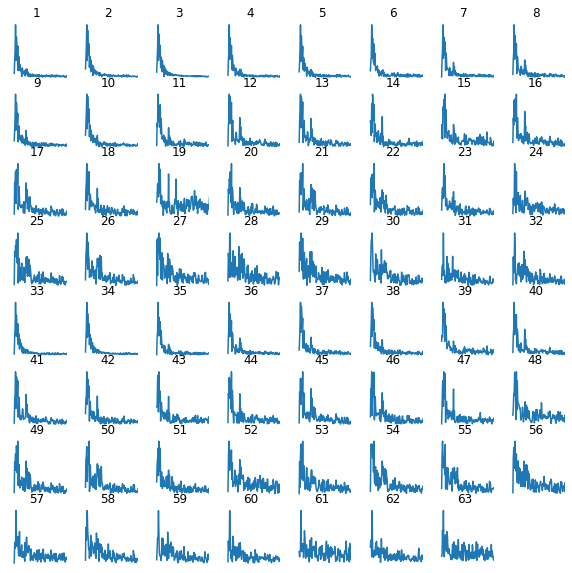

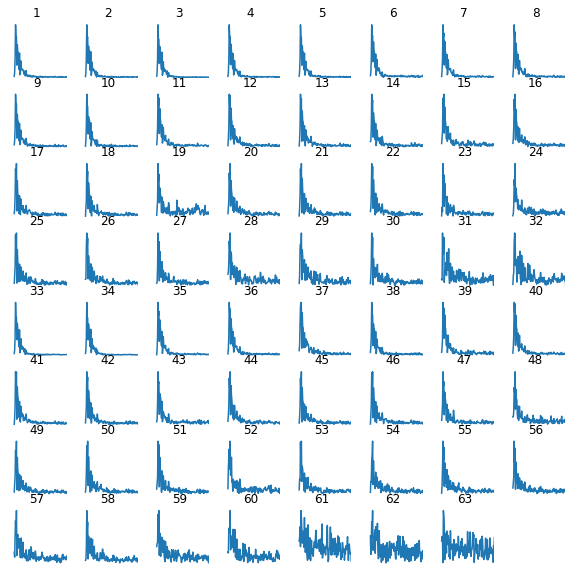

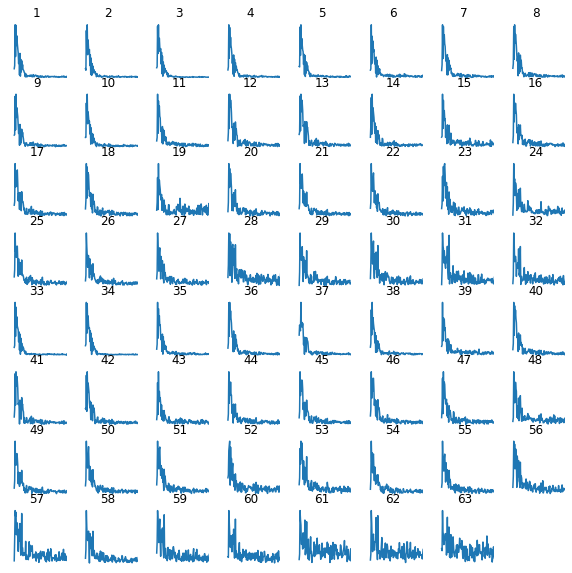

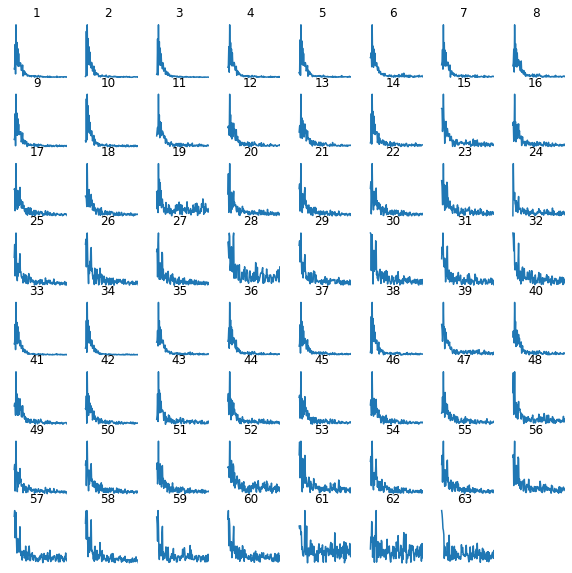

In [22]:
trial = 12
channel = 3
for k in range(25):
  fig = plt.figure(figsize=(10,10))
  for i in range(63):
    ax = fig.add_subplot(8,8,i+1, title=i+1)
    ax.plot(f, np.abs(np.fft.fft(train_data_1[k,:,i])))
    ax.set_xlim([-5,40])
    ax.axis('off')
  fig.savefig('00{}.png'.format(k+1))

In [10]:
data = [np.sin(i*t) for i in range(25)]
data = np.array(data)
data.shape

(5, 7200)

In [0]:
FFT = np.fft.fft(data)

In [12]:
FFT.shape

(5, 7200)

(0.0, 7.0)

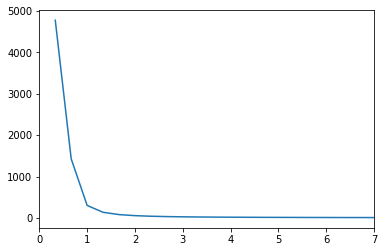

In [13]:
plt.plot(f, np.abs(FFT[1]))
plt.xlim([0,7])

In [0]:
from google.colab import files
for i in range(1,25):
  files.download('00{}.png'.format(i)) 

# Localization

In [275]:
subj_1 = datafetch.fetch_subject(1)
data = subj_1['train_data_class1']
data.shape

(25, 7200, 63)

In [0]:
select_channels = np.array([3,34,33])
meaned_channels = np.mean(data[:,:,select_channels-1], axis=2)
meaned_channels = np.expand_dims(meaned_channels, axis=2)
meaned_channels.shape
data[:,:, select_channels-1] -= meaned_channels
#data[:,:, select_channels-1] =0

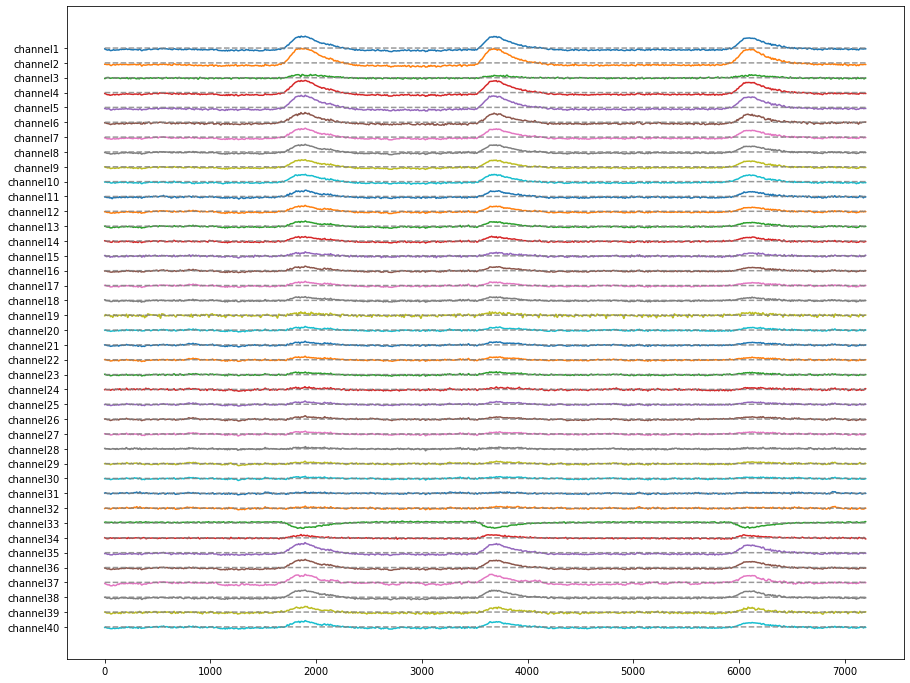

In [274]:
plotters.EEG_plotter( 40, data[22])

array([3.33333333e-01, 6.66666667e-01, 1.00000000e+00, ...,
       2.39933333e+03, 2.39966667e+03, 2.40000000e+03])

In [0]:
FFT = []
t = np.linspace(0,3,7200)
f = np.linspace(1/3, 2400, 7200)
f_cut_min = 20
f_cut_max = 150
for trial in data:
  fft = np.fft.fft(trial.T)
  fft = fft.T
  fft = fft[(f>f_cut_min)*(f<f_cut_max),:]

  FFT.append(fft)
FFT = np.array(FFT)
f = f[(f>f_cut_min)*(f<f_cut_max)]

In [330]:
FFT.shape

(25, 389, 63)

In [331]:
f.shape

(389,)

(0.0, 150.0)

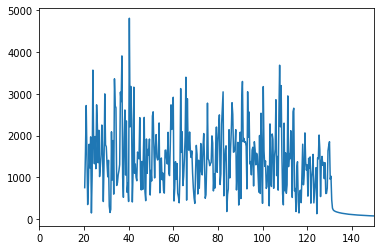

In [332]:
plt.plot(f, np.abs(FFT[10][:,20]))
plt.xlim([0,150])

In [0]:
power = np.sum(np.abs(FFT), axis=1)
power = np.expand_dims(power, axis=1)
#power_ = np.delete(power, [1,2,34,33], axis=2)

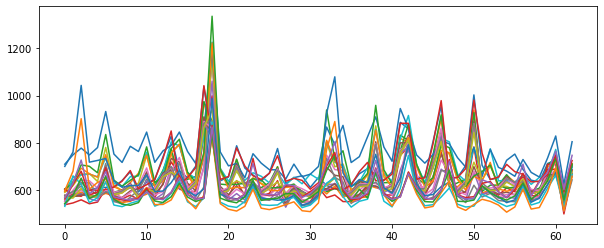

In [334]:
plt.figure(figsize=(10,4))
a = plt.plot(power[:,0,:].T**0.5)

In [165]:
power.shape

(25, 1, 63)

(25, 1, 59)

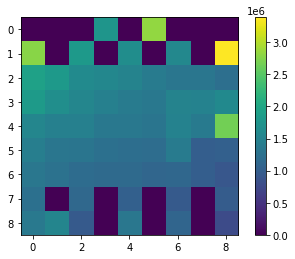

In [99]:
eplt.imshow(scalp_plotter(power[4],0))
plt.colorbar()

In [0]:
high_res = np.zeros((20,20))

In [0]:
high_res[1:-1:2,1:-1:2] = scalp_plotter(power[4],0)

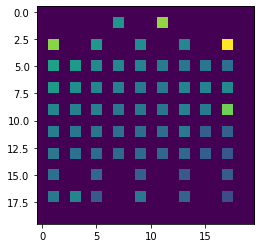

In [161]:
plt.imshow(high_res)

In [0]:
for i in range(2,20,2):
  for j in range(2,20,2):
    high_res[i,j] = np.mean([high_res[i+1,j],high_res[i-1,j],high_res[i,j+1],high_res[i,j-1]])

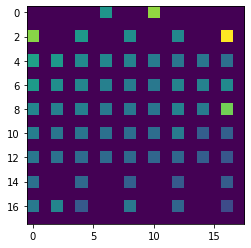

In [163]:
plt.imshow(high_res[1:-1,1:-1])

In [0]:
from plotters import scalp_plotter

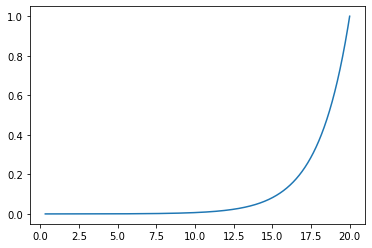

In [362]:
tt = np.linspace(0,10,100)
f = np.linspace(1/3, 20, 7200)

tau=2
plt.plot(f, np.exp(f/tau)/np.exp(f[-1]/tau))


In [363]:
def Localizer(subject_data, save=False):

  #subject_data = subj_1['train_data_class1']
  data = subject_data
  FFT = []
  t = np.linspace(0,3,7200)
  f = np.linspace(1/3, 2400, 7200)
  f_cut_min = 10
  f_cut_max = 150
  for trial in data:
    fft = np.fft.fft(trial.T)
    fft = fft.T
    fft = fft[(f>f_cut_min)*(f<f_cut_max),:]

    FFT.append(fft)
  FFT = np.array(FFT)
  f = f[(f>f_cut_min)*(f<f_cut_max)]
  power = np.sum(np.abs(FFT), axis=1)
  power = np.expand_dims(power, axis=1)
  
  #del_list=np.array([1,2,3,34,33])-1
  #power[:,0:,del_list] = np.mean(power[:,0,:])

  fig = plt.figure(figsize=(10,10))

  for i in range(25):
    ax = fig.add_subplot(5,5,i+1)
    mat = scalp_plotter(power[i], 0)
    im = ax.imshow(mat)
    ax.axis('off')
    #fig.colorbar(im)
  plt.figure()
  a = plt.plot(power[:,0,:].T**0.5)
  #plt.legend(['trial{}'.format(i+1) for i in range(25)])



ERROR! Session/line number was not unique in database. History logging moved to new session 63


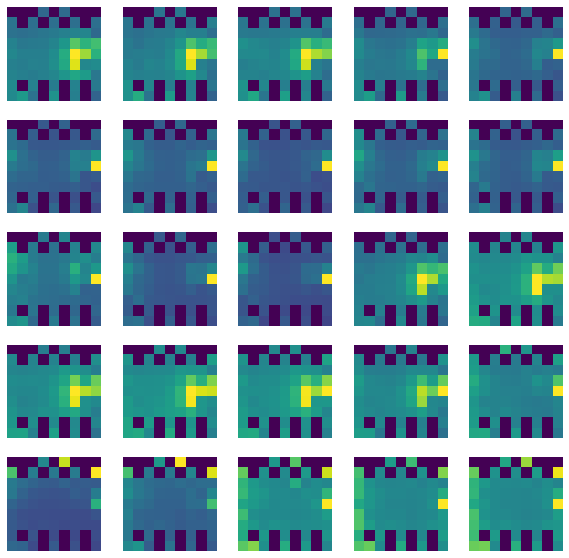

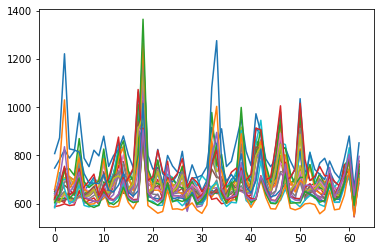

In [364]:
Localizer(subj_1['train_data_class1'])

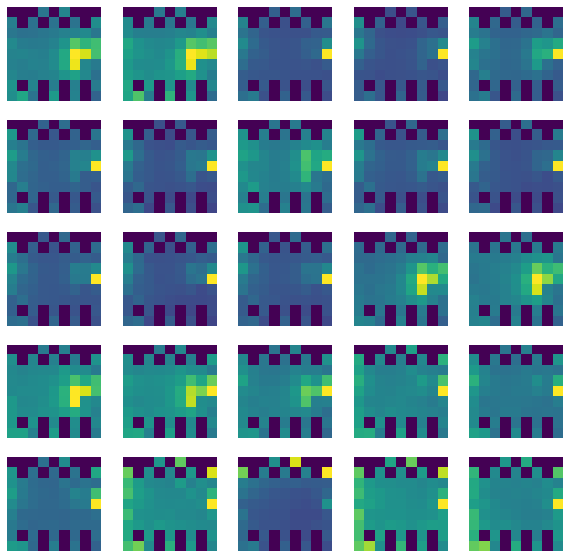

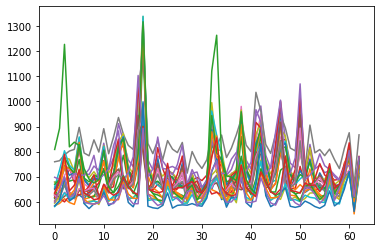

In [339]:
Localizer(subj_1['train_data_class2'])

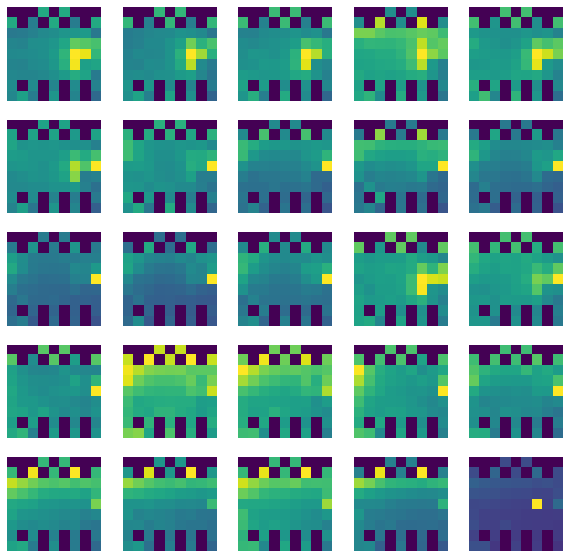

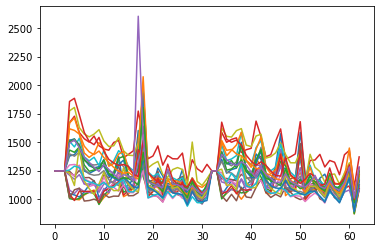

In [188]:
Localizer(subj_1['train_data_class3'])

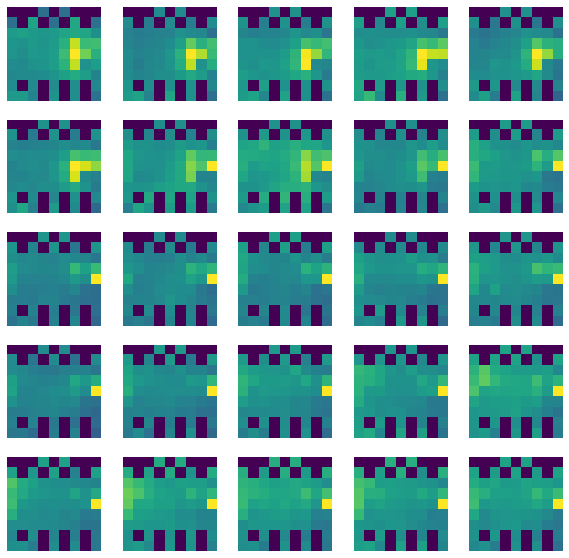

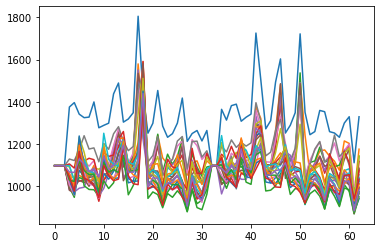

In [189]:
Localizer(subj_1['train_data_class4'])